# Unit 5 - Financial Planning


In [441]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import quandl as quan
import requests as request
import json
import matplotlib.pyplot as mplot
from MCForecastTools import MCSimulation
import pytz

%matplotlib inline

In [442]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [443]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [444]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]


In [445]:
# Compute current value of my crpto
btc_value = btc * btc_price
eth_value = eth * eth_price
crypto_total = btc_value + eth_value

# Print current crypto wallet balance

print(f"The current value of your {btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${eth_value:0.2f}")
print(f"The total value of your crypto portfolio is ${crypto_total:0.2f}")

The current value of your 1.2 BTC is $55694.42
The current value of your 5.3 ETH is $16500.25
The total value of your crypto portfolio is $72194.67


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [446]:
# Current amount of shares
spy = 50
agg = 200

In [447]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY") 
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")

# Create the Alpaca API object
alpaca = tradeapi.REST(ALPACA_API_KEY,ALPACA_API_SECRET,api_version = "v2")

In [448]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-20", tz="America/Chicago").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stocks_close = alpaca.get_barset(ticker, timeframe, start = today, end= today).df


# Preview DataFrame
stocks_close

AGG                                    SPY  \
                             open   high     low   close   volume   open   
time                                                                       
2021-05-20 00:00:00-04:00  114.08  114.3  114.08  114.29  5647134  411.8   

                                                              
                              high     low   close    volume  
time                                                          
2021-05-20 00:00:00-04:00  416.625  411.67  415.24  69426295

In [449]:
# Pick AGG and SPY close prices
agg_close = stocks_close.iloc[0,3]
spy_close = stocks_close.iloc[0,8]
                  
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $114.29
Current SPY closing price: $415.24


In [450]:
# Compute the current value of shares
spy_value = (spy) * (spy_close)
agg_value = (agg) * (agg_close)
stocks_total = (spy_value) + (agg_value)

# Print current value of share
print(f"The current value of your {spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {agg} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your stock portfolio is ${stocks_total:0.2f}")

The current value of your 50 SPY shares is $20762.00
The current value of your 200 AGG shares is $22858.00
The current value of your stock portfolio is $43620.00


### Savings Health Analysis

In [451]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = [{'Savings': crypto_total}, {'Savings': stocks_total}]
savings_df = pd.DataFrame(savings_data, index = ['Crypto', 'Stocks'])
total_savings = crypto_total + stocks_total
# Display savings DataFrame
savings_df

,Savings
Crypto,72194.672862
Stocks,43620.000000


['You have a total of $115814.67 in your savings',
 '62% of your savings is held in the crypto-currencies BTC and ETH',
 '38% of your savings is held in stocks SPY and AGG']

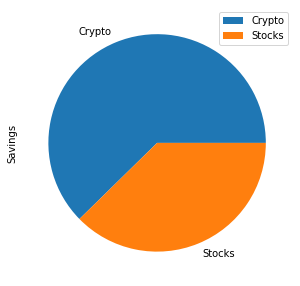

In [452]:
# Plot savings pie chart
savings_df.plot.pie(y="Savings", figsize=(5, 5))
pie = (f'You have a total of ${total_savings:0.2f} in your savings')
crypto_percent = (f'{((crypto_total / total_savings) * 100):0.0f}% of your savings is held in the crypto-currencies BTC and ETH')
stock_percent = (f'{((stocks_total / total_savings) * 100):0.0f}% of your savings is held in stocks SPY and AGG')
savings_app = [pie, crypto_percent, stock_percent]
savings_app

In [453]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total + stocks_total

# Validate saving health
if total_savings >= emergency_fund:
    savings_app_response = ('Congratulations! You have saved more than 3 months income for an emergency fund!')
else:
    savings_app_response = (f'You should increase your savings for an emergency fund. You currently need ${emergency_fund - total_savings} more to save 3 months income for an emergency fund')
print(savings_app_response)



Congratulations! You have saved more than 3 months income for an emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [454]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-20', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-05-20', tz='America/Chicago').isoformat()
thirty_year_end_date = pd.Timestamp('2021-05-20', tz='America/Chicago').isoformat

In [455]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = '1D'
historical_stock_data = alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date, limit = 1000).df

# Display sample data
historical_stock_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-06-01 00:00:00-04:00  109.36  109.5000  109.3409  109.470  2241270   
2017-06-02 00:00:00-04:00  109.74  109.8900  109.7047  109.840  1322101   
2017-06-05 00:00:00-04:00  109.66  109.7400  109.6000  109.660  2074161   
2017-06-06 00:00:00-04:00  109.87  109.9500  109.8100  109.870  1434088   
2017-06-07 00:00:00-04:00  109.81  109.8700  109.7000  109.730  1570692   
...                           ...       ...       ...      ...      ...   
2021-05-14 00:00:00-04:00  114.22  114.2800  114.1219  114.280  3711363   
2021-05-17 00:00:00-04:00  114.21  115.4999  111.2600  114.165  3852318   
2021-05-18 00:00:00-04:00  114.11  114.1100  114.0300  114.070  3499293   
2021-05-19 00:00:00-04:00  114.62  114.6200  113.7900  113.920  6576312   
2021-05-20 00:00:00-04:00  114.08  114.3000  114.0800  114.290  5647134   

                              SPY                                       
                             open     high      low    close    volume  
time                                                                    
2017-06-01 00:00:00-04:00  241.96  243.340  241.640  243.320  50837868  
2017-06-02 00:00:00-04:00  243.41  244.350  243.080  244.130  50298878  
2017-06-05 00:00:00-04:00  243.98  244.300  243.760  243.965  27596403  
2017-06-06 00:00:00-04:00  243.31  243.980  243.120  243.250  36562468  
2017-06-07 00:00:00-04:00  243.60  243.920  242.830  243.650  38602639  
...                           ...      ...      ...      ...       ...  
2021-05-14 00:00:00-04:00  413.20  417.490  413.180  416.530  69027661  
2021-05-17 00:00:00-04:00  415.39  416.390  413.360  415.550  57714535  
2021-05-18 00:00:00-04:00  415.80  416.060  411.770  411.990  52318865  
2021-05-19 00:00:00-04:00  406.92  411.050  405.335  410.900  94165741  
2021-05-20 00:00:00-04:00  411.80  416.625  411.670  415.240  69426295  

[1000 rows x 10 columns]

In [457]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_yr_sim = MCSimulation(historical_stock_data, [.4, .6], 500, 252 * 30)


In [458]:
# Printing the simulation input data
historical_stock_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-06-01 00:00:00-04:00  109.36  109.5000  109.3409  109.470  2241270   
2017-06-02 00:00:00-04:00  109.74  109.8900  109.7047  109.840  1322101   
2017-06-05 00:00:00-04:00  109.66  109.7400  109.6000  109.660  2074161   
2017-06-06 00:00:00-04:00  109.87  109.9500  109.8100  109.870  1434088   
2017-06-07 00:00:00-04:00  109.81  109.8700  109.7000  109.730  1570692   
...                           ...       ...       ...      ...      ...   
2021-05-14 00:00:00-04:00  114.22  114.2800  114.1219  114.280  3711363   
2021-05-17 00:00:00-04:00  114.21  115.4999  111.2600  114.165  3852318   
2021-05-18 00:00:00-04:00  114.11  114.1100  114.0300  114.070  3499293   
2021-05-19 00:00:00-04:00  114.62  114.6200  113.7900  113.920  6576312   
2021-05-20 00:00:00-04:00  114.08  114.3000  114.0800  114.290  5647134   

                              SPY                                       
                             open     high      low    close    volume  
time                                                                    
2017-06-01 00:00:00-04:00  241.96  243.340  241.640  243.320  50837868  
2017-06-02 00:00:00-04:00  243.41  244.350  243.080  244.130  50298878  
2017-06-05 00:00:00-04:00  243.98  244.300  243.760  243.965  27596403  
2017-06-06 00:00:00-04:00  243.31  243.980  243.120  243.250  36562468  
2017-06-07 00:00:00-04:00  243.60  243.920  242.830  243.650  38602639  
...                           ...      ...      ...      ...       ...  
2021-05-14 00:00:00-04:00  413.20  417.490  413.180  416.530  69027661  
2021-05-17 00:00:00-04:00  415.39  416.390  413.360  415.550  57714535  
2021-05-18 00:00:00-04:00  415.80  416.060  411.770  411.990  52318865  
2021-05-19 00:00:00-04:00  406.92  411.050  405.335  410.900  94165741  
2021-05-20 00:00:00-04:00  411.80  416.625  411.670  415.240  69426295  

[1000 rows x 10 columns]

In [438]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_yr_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003732,0.994589,1.001702,1.010407,1.001442,1.007317,0.994855,0.999557,1.015994,0.998134,...,0.984329,0.999152,0.998844,1.000929,1.005598,0.996821,1.008091,0.996991,1.005017,0.996011
2,0.992728,1.002821,0.999754,1.007152,1.010287,1.015520,0.983464,0.992809,1.012018,1.006657,...,0.989595,0.994032,1.004144,1.002028,0.994908,0.999900,0.994472,0.993239,0.996408,0.996947
3,0.991880,1.005531,0.986650,1.001468,1.011441,1.014140,0.977949,0.991718,1.017666,1.009520,...,0.982683,0.987665,0.999504,1.009328,0.998539,1.018484,0.989851,0.995398,0.997754,0.990424
4,0.995143,1.012197,0.996824,0.995607,1.008820,1.018026,0.975756,0.983721,1.014573,1.014016,...,0.988768,0.994531,1.002905,0.992088,1.008531,1.012953,0.994769,1.010581,0.986441,0.992827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.896602,21.127818,16.085016,29.159852,25.788622,25.208766,16.055733,14.050185,15.796339,20.141901,...,7.865132,25.641177,16.971870,30.190722,41.630770,26.616227,33.189302,13.978168,13.379710,10.011440
7557,7.914022,21.412315,16.098714,29.135253,25.845173,25.099655,16.086529,14.101397,15.571302,20.068081,...,7.881961,25.671253,16.775620,30.323209,41.554618,26.787173,33.495650,14.079489,13.309803,10.023198
7558,7.923125,21.663358,15.890669,29.225126,25.568011,25.269882,16.286616,14.140916,15.663842,20.314888,...,7.842569,25.524165,16.755867,29.744315,41.903302,26.886930,33.588851,14.039681,13.276664,10.010967
7559,7.933215,21.644718,16.005259,29.283866,25.370122,25.112610,16.275778,14.113088,15.616793,20.176742,...,7.856811,25.161120,16.853266,29.796979,41.327700,26.794420,33.629132,14.001188,13.271345,10.111579


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

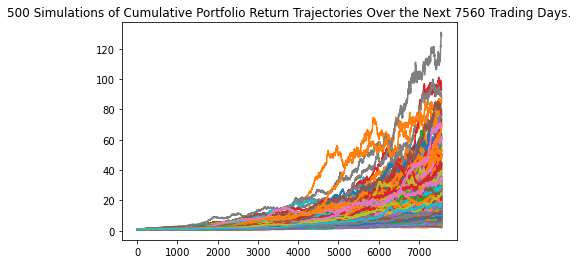

In [462]:
# Plot simulation outcomes
thirty_yr_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

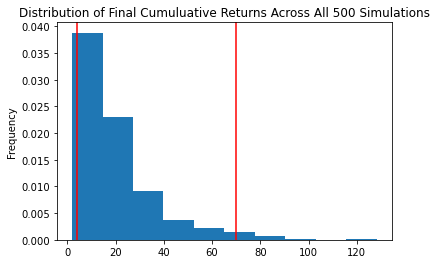

In [463]:
# Plot probability distribution and confidence intervals
thirty_yr_sim.plot_distribution()

### Retirement Analysis

In [464]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_yr_summary = thirty_yr_sim.summarize_cumulative_return()

# Print summary statistics
print(thirty_yr_summary)

count           500.000000
mean             19.797472
std              16.528945
min               1.988324
25%               8.797226
50%              14.762893
75%              24.546783
max             128.207557
95% CI Lower      4.035319
95% CI Upper     69.808081
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [468]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = thirty_yr_summary.loc['95% CI Lower'] * initial_investment
ci_upper = thirty_yr_summary.loc['95% CI Upper'] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $80706.37694744111 and $1396161.6246806844
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80706.37694744111 and $1396161.6246806844


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [470]:
# Set initial investment
increased_investment = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
inc_ci_lower = thirty_yr_summary.loc['95% CI Lower'] * increased_investment
inc_ci_upper = thirty_yr_summary.loc['95% CI Upper'] * increased_investment

# Print results
print(f"There is a 95% chance that an investment of ${increased_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${inc_ci_lower} and ${inc_ci_upper}")

There is a 95% chance that an investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $121059.56542116166 and $2094242.4370210266
